<div align="center">
    <img src="../Logo/Ahjin_Logo-removebg-preview.png"
         alt="Ahjin Logo"
         style="width:250px; height:250px; border-radius:50%;">
</div>

# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING

In [67]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# String manipulation
import re

# Mathematical Operations
import math

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display

### Load all datasets

#### 1. movies dataset

In [68]:
# Load movie data and print it out
movie_data = pd.read_csv('../Raw Data/movies.csv')
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### 2. ratings dataset

In [69]:
# Load ratings data and print it out
ratings_data = pd.read_csv('../Raw Data/ratings.csv')
ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#### 3. links dataset

In [70]:
# Load links data and print it out
links_data = pd.read_csv('../Raw Data/links.csv')
links_data

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


#### 4. tags dataset

In [71]:
# Load tags data and print it out
tags_data = pd.read_csv('../Raw Data/tags.csv')
tags_data

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### Merge movies and ratings for our recommender system.

In [72]:
# Merge ratings with movies to get movie info per rating
df = ratings_data.merge(movie_data, on="movieId", how="left")
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


#### Drop timestamp because we are not going to do any temporal analysis.

In [73]:
# Drop ids and timestamp
df = df.drop(columns=['timestamp'])
df

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
100831,610,166534,4.0,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,Get Out (2017),Horror
100834,610,168252,5.0,Logan (2017),Action|Sci-Fi


In [ ]:
# Function to extract year and clean title
def extract_year(title):
    match = re.search(r'\((\d{4})\)$', title)
    if match:
        return int(match.group(1))
    else:
        return None

def clean_title(title):
    return re.sub(r'\s*\(\d{4}\)$', '', title)

# Apply to dataframe
df['year'] = df['title'].apply(extract_year)
df['title'] = df['title'].apply(clean_title)

#### Carry out Initial Data Understanding (IDE)

In [75]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check columns
print('\n'+'--'*46)
print("Columns:")
display(df.columns)

# Check metadata
print('\n'+'--'*46)
print("Metadata Check:")
display(df.info())

# Descriptive statistics
print('\n'+'--'*46)
print("Descriptive Statistics For Numeric Variables:")
display(df.describe().T)

# Categorical Variables
print('\n'+'--'*46)
print("Descriptive Statistics For Categorical Variables:")
display(df.describe(include='object').T)

The dataset has 100836 rows and 6 columns.

--------------------------------------------------------------------------------------------
Columns:


Index(['userId', 'movieId', 'rating', 'title', 'genres', 'year'], dtype='object')


--------------------------------------------------------------------------------------------
Metadata Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
 4   genres   100836 non-null  object 
 5   year     100805 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.6+ MB


None


--------------------------------------------------------------------------------------------
Descriptive Statistics For Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
userId,100836.0,326.127564,182.618491,1.0,177.0,325.0,477.0,610.0
movieId,100836.0,19435.295718,35530.987199,1.0,1199.0,2991.0,8122.0,193609.0
rating,100836.0,3.501557,1.042529,0.5,3.0,3.5,4.0,5.0
year,100805.0,1994.443708,14.361383,1902.0,1990.0,1997.0,2003.0,2018.0



--------------------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
title,100836,9446,Forrest Gump,329
genres,100836,951,Comedy,7196


#### Check data uniqueness and completeness.

In [76]:
# Check and remove duplicates
print("Duplicates:", df.duplicated().sum())

# Check number unique values
print('\n'+'--'*20)
print("Number of Unique values:")
display(df.nunique())

# Check data completeness
print('\n'+'--'*20)
print("Missingness check:")
display(df.isna().sum())

Duplicates: 0

----------------------------------------
Number of Unique values:


userId      610
movieId    9724
rating       10
title      9446
genres      951
year        106
dtype: int64


----------------------------------------
Missingness check:


userId      0
movieId     0
rating      0
title       0
genres      0
year       31
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

## UNIVARIATE ANALYSIS

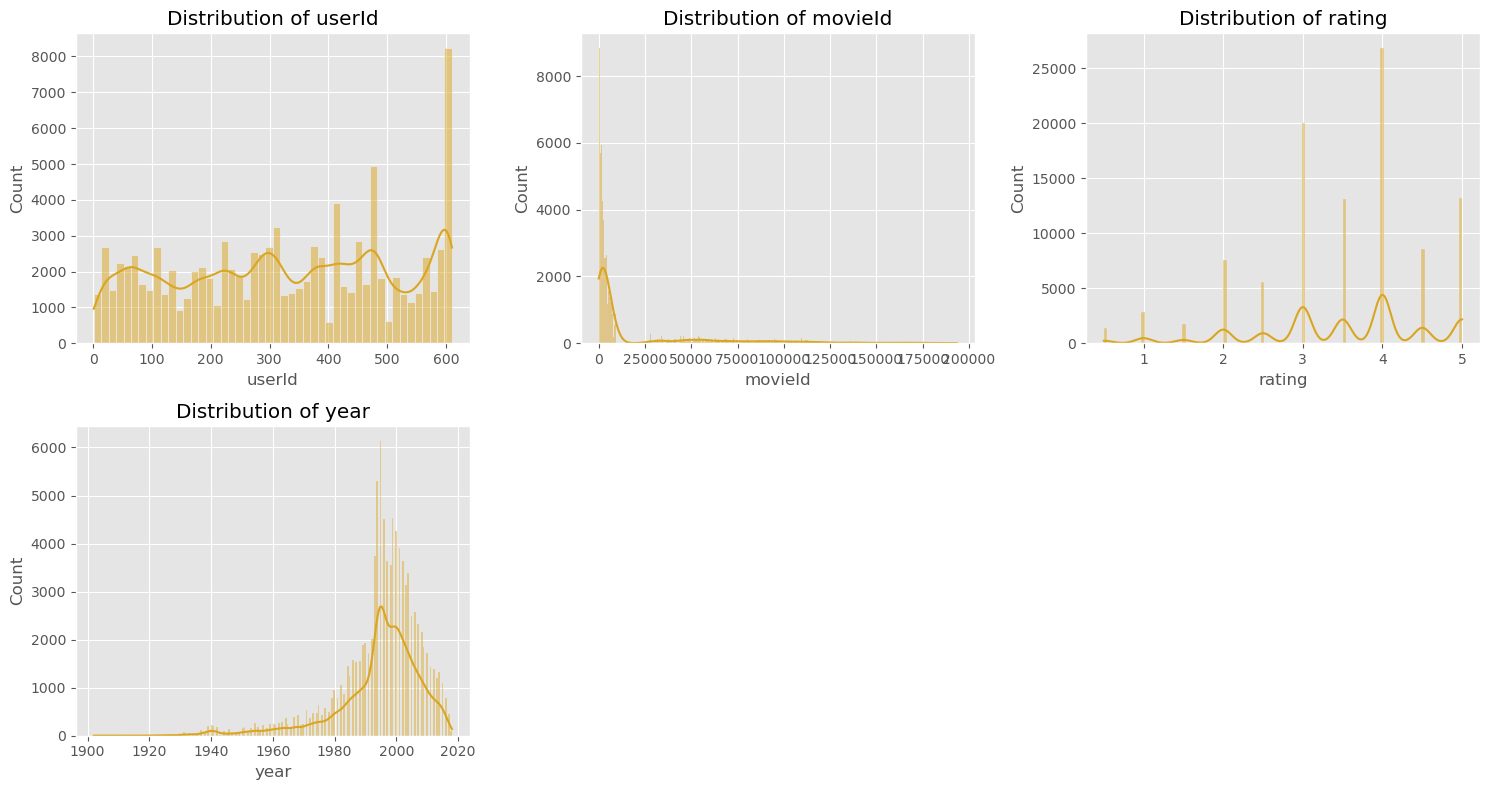

In [77]:
# Plot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='goldenrod')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

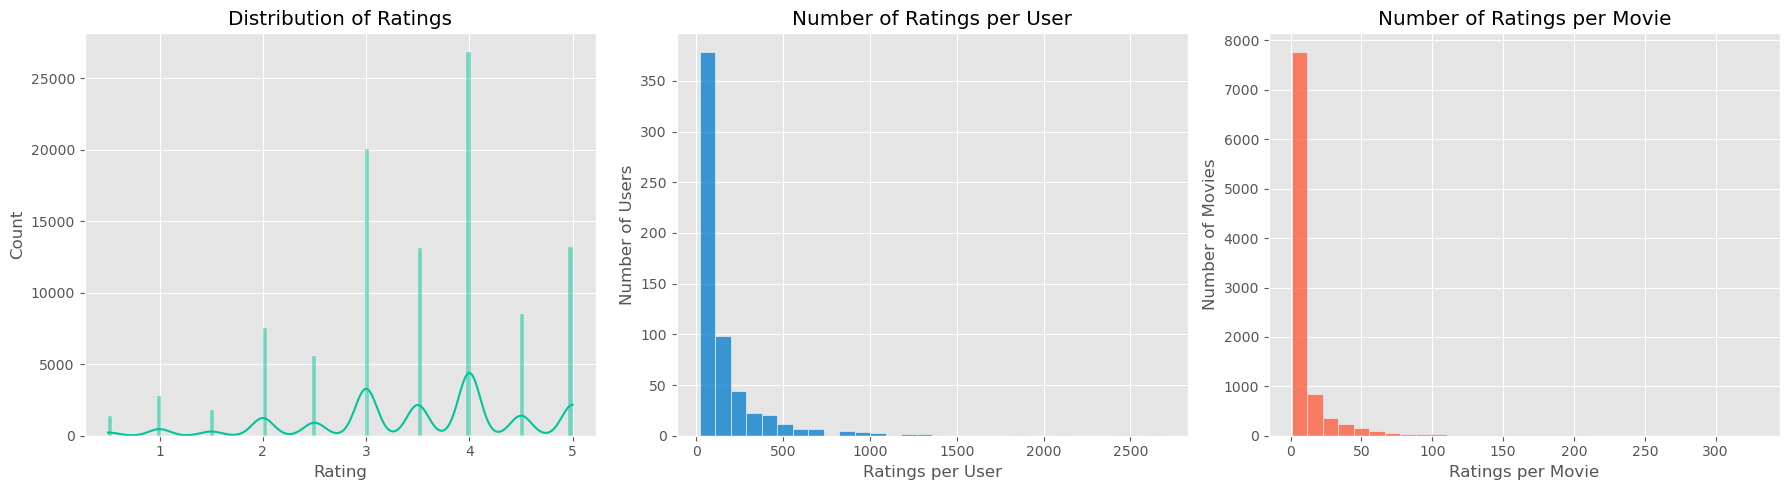

In [78]:
# Precomputed distributions
rating_dist = df["rating"]
user_counts = df.groupby("userId")["rating"].count()
movie_counts = df.groupby("movieId")["rating"].count()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ---- 1. Rating Distribution ----
sns.histplot(rating_dist, kde=True, ax=axes[0], color='#00C49A')
axes[0].set_title("Distribution of Ratings")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# ---- 2. Ratings Per User ----
sns.histplot(user_counts, bins=30, ax=axes[1], color='#007ACC')
axes[1].set_title("Number of Ratings per User")
axes[1].set_xlabel("Ratings per User")
axes[1].set_ylabel("Number of Users")

# ---- 3. Ratings Per Movie ----
sns.histplot(movie_counts, bins=30, ax=axes[2], color='#FF5733')
axes[2].set_title("Number of Ratings per Movie")
axes[2].set_xlabel("Ratings per Movie")
axes[2].set_ylabel("Number of Movies")

plt.tight_layout()
plt.show()

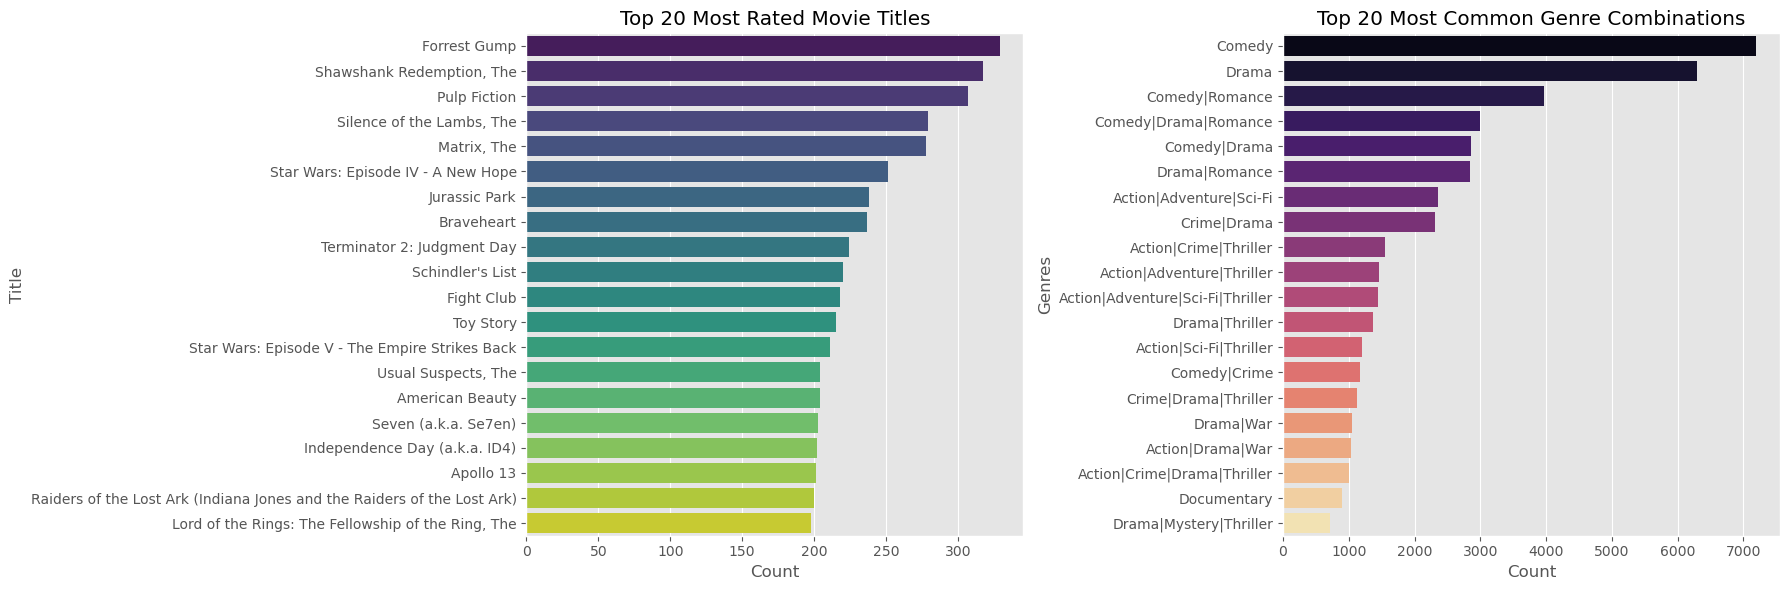

In [79]:
# Count frequency of each category
top_titles = df['title'].value_counts().head(20)
top_genres = df['genres'].value_counts().head(20)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ---- Title counts ----
sns.barplot(x=top_titles.values, y=top_titles.index, ax=axes[0], palette="viridis")
axes[0].set_title("Top 20 Most Rated Movie Titles")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Title")

# ---- Genre counts ----
sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[1], palette="magma")
axes[1].set_title("Top 20 Most Common Genre Combinations")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Genres")

plt.tight_layout()
plt.show()

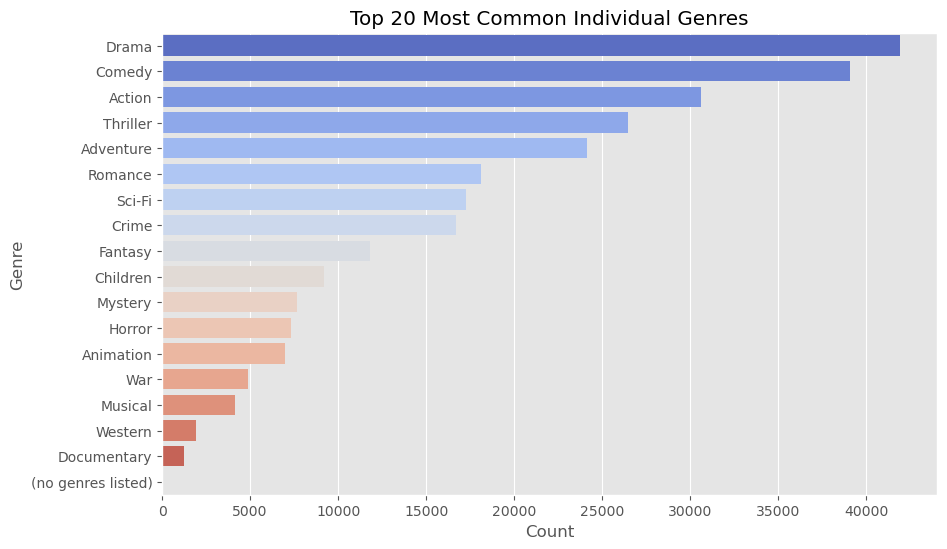

In [80]:
# Split genre combinations into individual genres
genre_list = (
    df['genres']
    .str.replace('IMAX', '')         # remove IMAX
    .str.replace('Film-Noir', '')   
    .str.replace('  ', ' ')
    .str.strip('|')
    .str.split('|')
    .explode()
)

genre_list = genre_list[genre_list != '']   # remove empty strings

# Count top genres
top_individual_genres = genre_list.value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_individual_genres.values, y=top_individual_genres.index, palette="coolwarm")
plt.title("Top 20 Most Common Individual Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()